# Data exploration

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.tight_layout()

import seaborn as sns
import numpy as np

df = pd.read_csv('./datasets/heart_disease.csv')
df.head()

Matplotlib is building the font cache; this may take a moment.


,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no


<Figure size 640x480 with 0 Axes>

In [2]:
shape = df.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns.")

The dataset has 3674 rows and 16 columns.


In [3]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.00000,3674.000000,3674.000000,3674.000000,3674.000000
mean,49.577300,1.984213,9.092270,0.030212,0.005716,0.310016,236.761840,132.38024,82.906505,25.783038,75.719652,81.769461
std,8.546068,1.022891,11.938399,0.171194,0.075397,0.462563,44.039295,22.04683,11.948024,4.056048,11.957171,23.884454
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.50000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,75.000000,23.080000,68.000000,71.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.00000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,263.000000,143.50000,89.500000,27.990000,82.000000,87.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,600.000000,295.00000,142.500000,56.800000,143.000000,394.000000


In [4]:
df.dtypes

sex                 object
age                  int64
education            int64
smokingStatus       object
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes            object
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose              int64
CHDRisk             object
dtype: object

In [5]:
categorical_columns = ['sex', 'education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'smokingStatus', 'diabetes', 'CHDRisk']

# print unique values for categorical columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

sex: ['male' 'female' nan]
education: [4 2 1 3]
BPMeds: [0 1]
prevalentStroke: [0 1]
prevalentHyp: [0 1]
smokingStatus: ['no' 'yes' nan]
diabetes: ['no' 'yes']
CHDRisk: ['no' 'yes']


# Data preparation

In [6]:
# count rows with missing values
df.isna().any(axis=1).sum()

22

In [7]:
# remove rows where smoking status is missing
df = df.dropna(subset=['smokingStatus'])

In [8]:
df = df.dropna(subset=['sex'])

df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [9]:
# Map the Values: Use the map function to convert ‘no’ to 0 and ‘yes’ to 1

df['smokingStatus'] = df['smokingStatus'].map({'no': 0, 'yes': 1})
df['diabetes'] = df['diabetes'].map({'no': 0, 'yes': 1})
df['CHDRisk'] = df['CHDRisk'].map({'no': 0, 'yes': 1})

# Data visualization

## Numerical values distribution

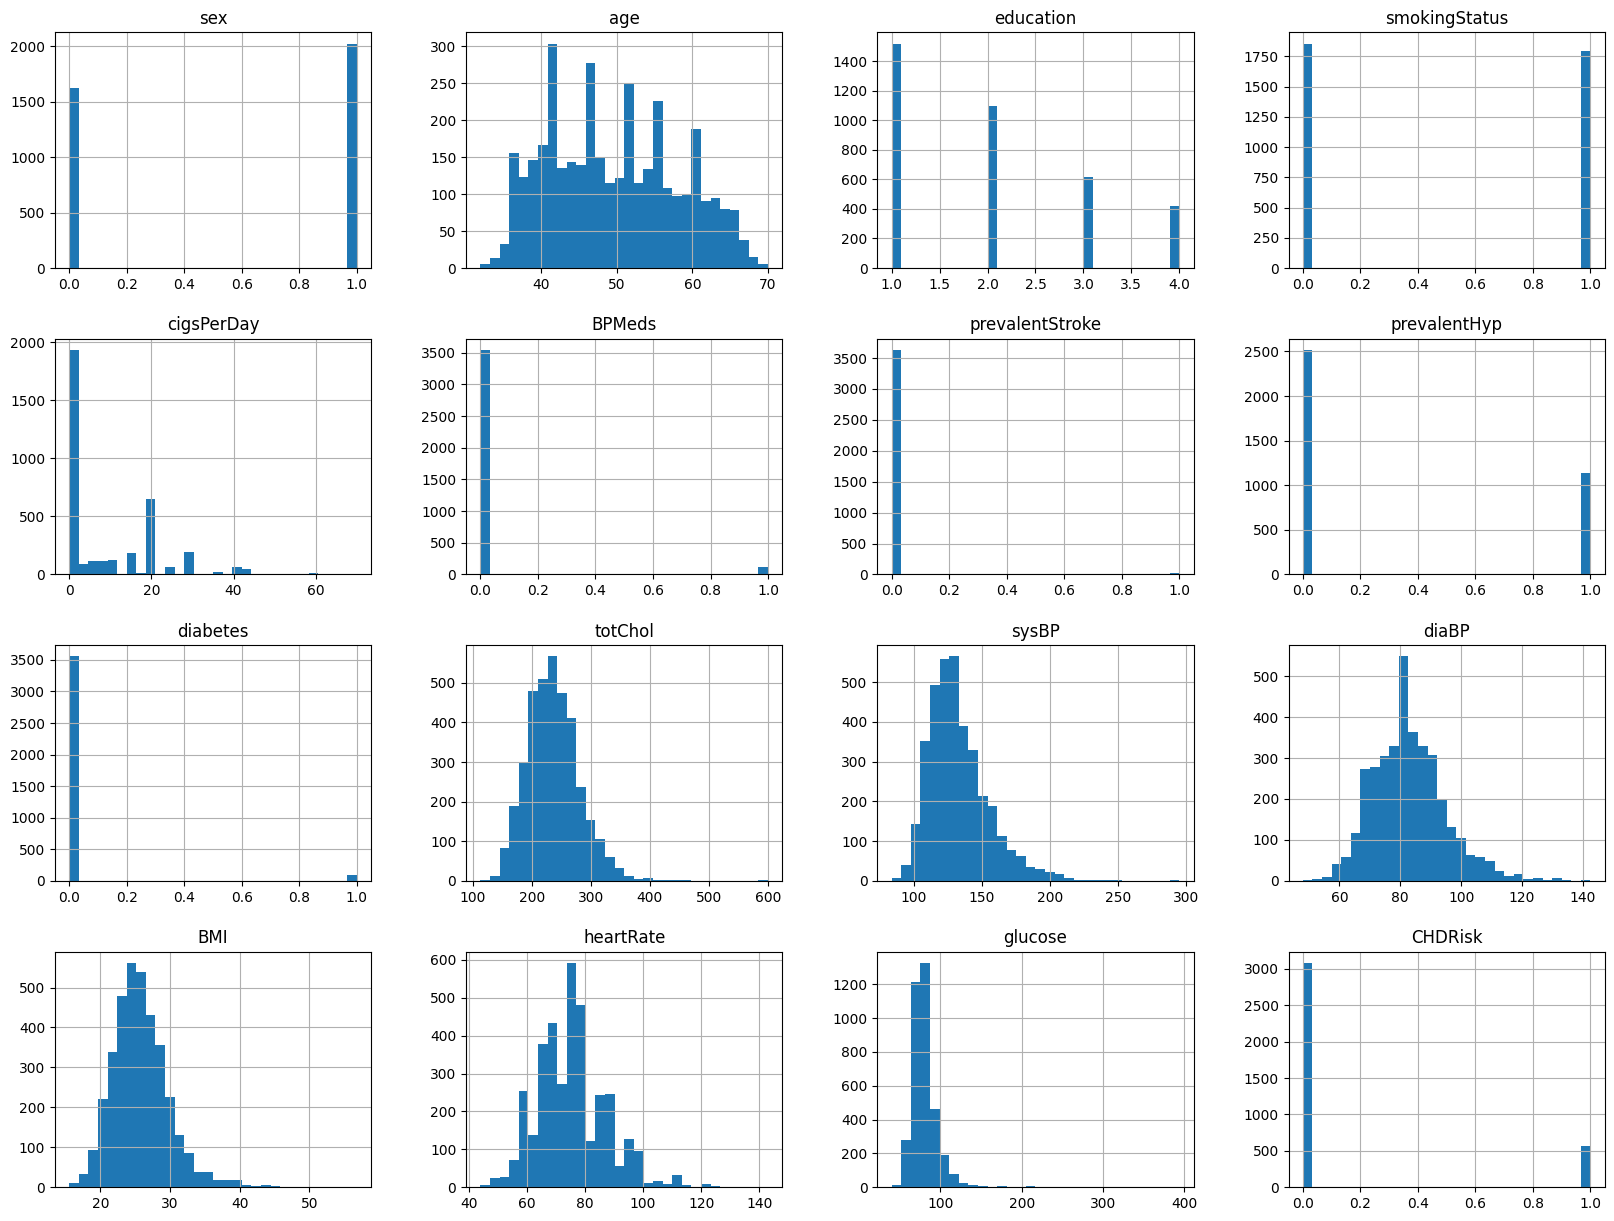

In [10]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

## Count plots for categorical values

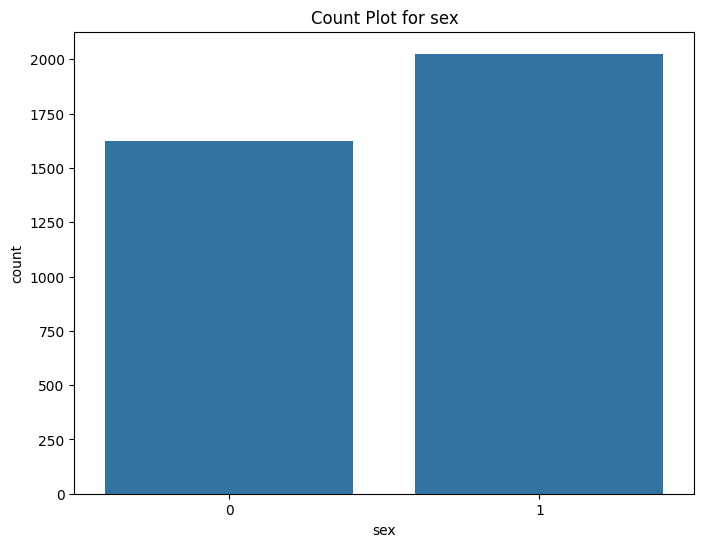

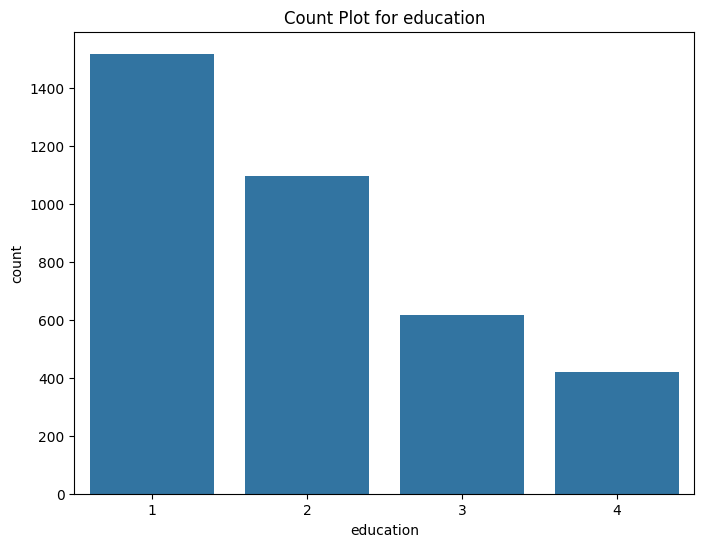

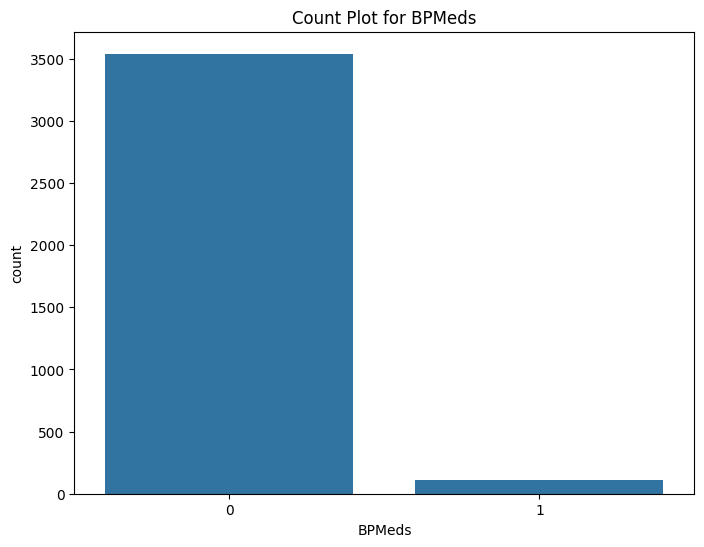

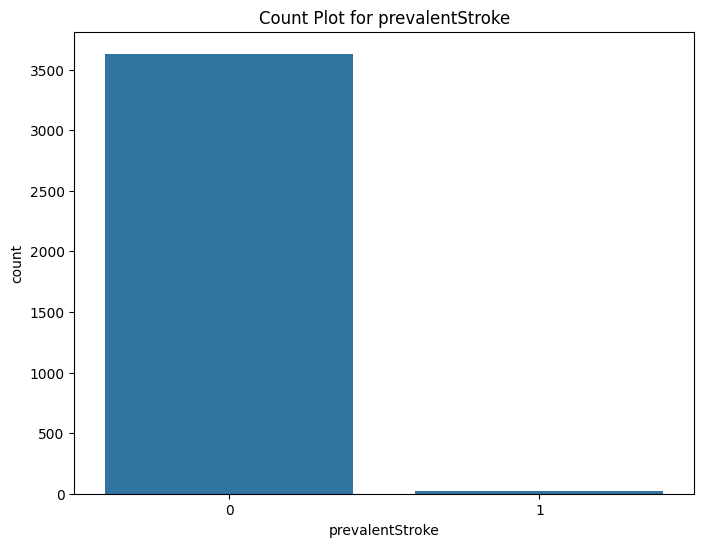

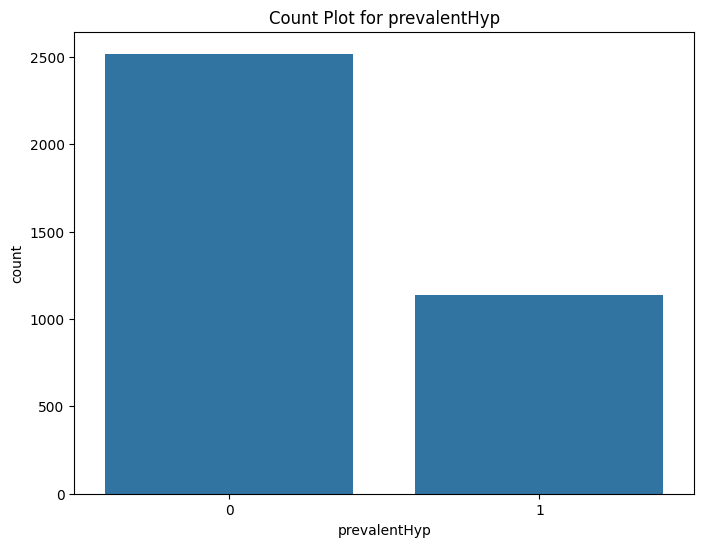

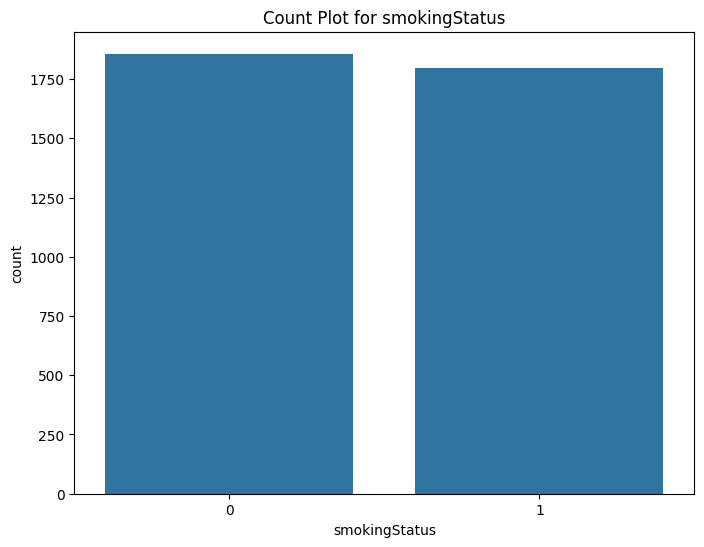

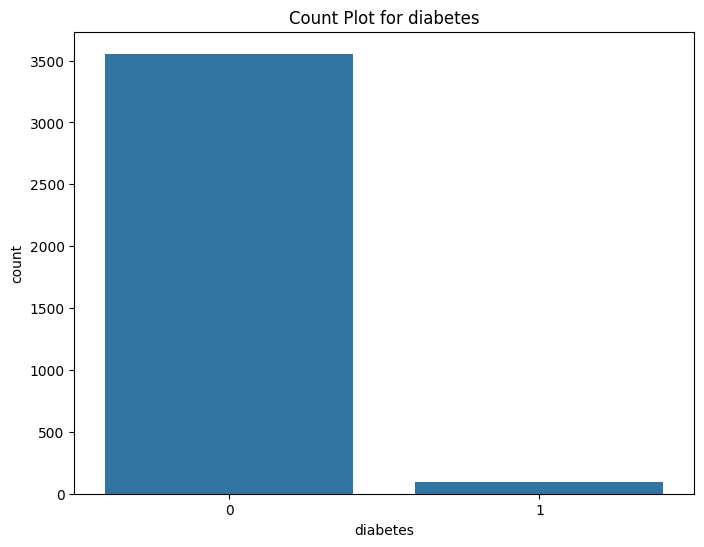

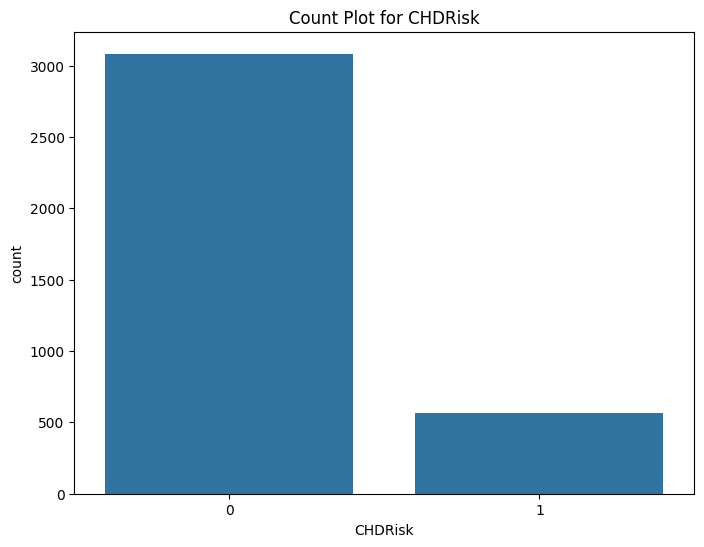

In [11]:
# Plot count plots for categorical columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot for {column}')
    plt.show()

## Box plots to explore relationships

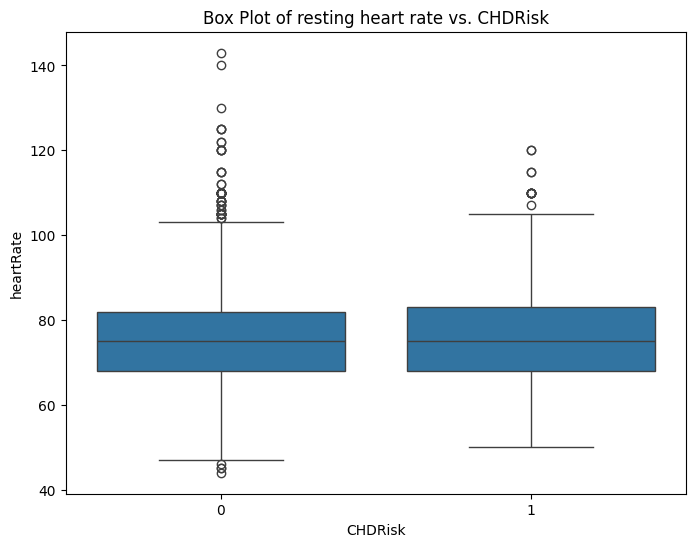

In [12]:
# Example: Relationship between CHDRisk and heart rate
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='CHDRisk', y='heartRate')
plt.title('Box Plot of resting heart rate vs. CHDRisk')
plt.show()

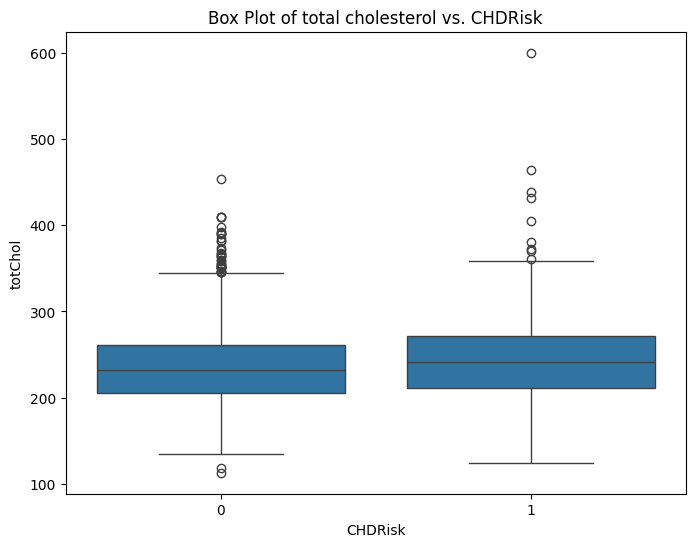

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='CHDRisk', y='totChol')
plt.title('Box Plot of total cholesterol vs. CHDRisk')
plt.show()

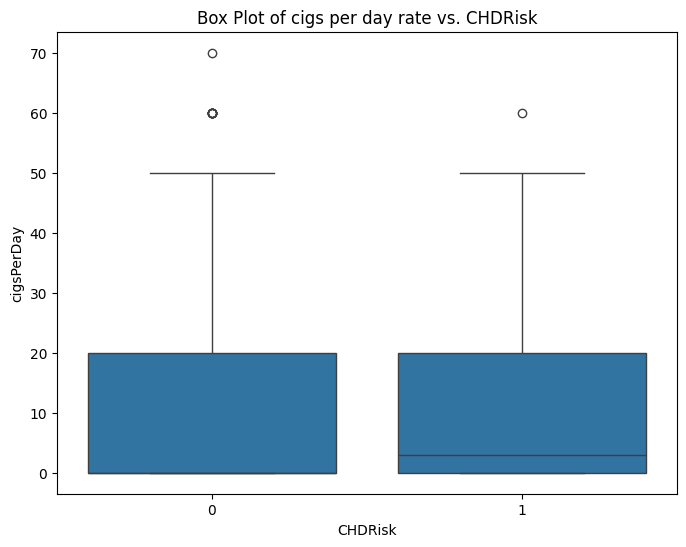

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='CHDRisk', y='cigsPerDay')
plt.title('Box Plot of cigs per day rate vs. CHDRisk')
plt.show()

# Correlation analysis

<Axes: title={'center': 'Correlation Matrix'}>

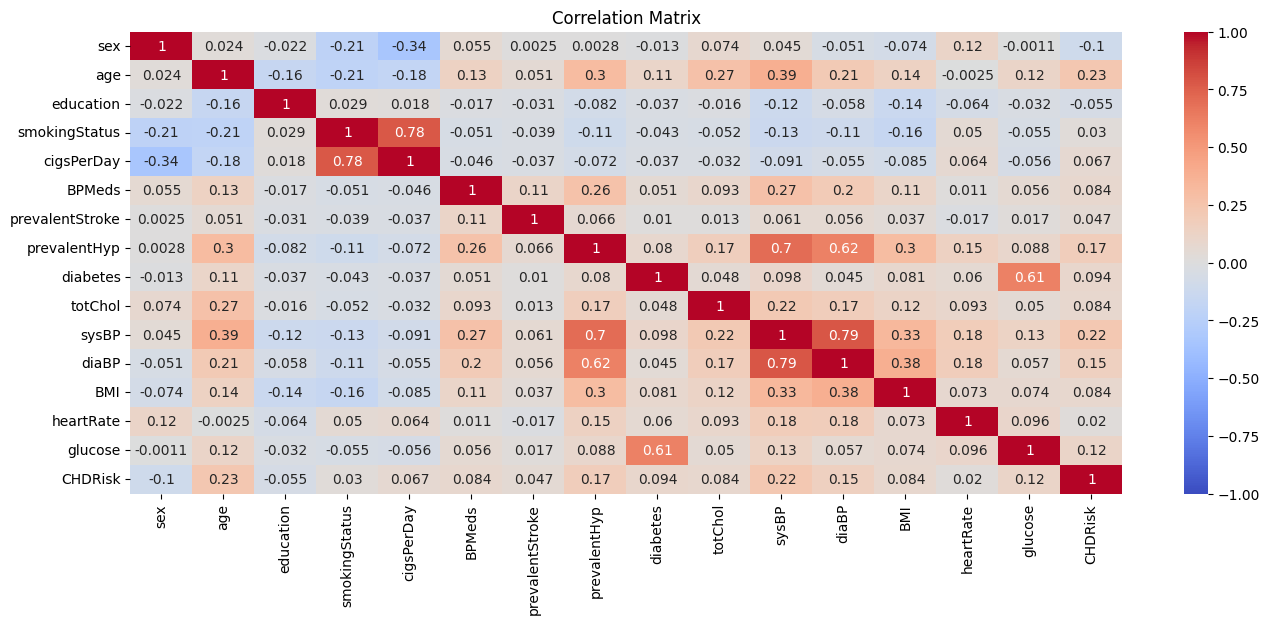

In [15]:
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Matrix')
heatmap

# Split data into features

In [21]:
df.columns

Index(['sex', 'age', 'education', 'smokingStatus', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CHDRisk'],
      dtype='object')

In [17]:
selected_columns = ['age', 'prevalentHyp', 'sysBP', 'diaBP', 'glucose']

X = df[selected_columns]
X = df.drop(labels=['CHDRisk'], axis=1).values
y = df[['CHDRisk']].values

# Split into training and test data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create linear model

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model evaluation

In [20]:
from sklearn.metrics import r2_score

# calculate R2-score
y_test_pred = model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.06039801583821336
